In [3]:

from bs4 import BeautifulSoup

html_file = r'C:\Users\dev\Downloads\twoormore.html'
with open(html_file, 'rb') as myfile:
    html_str = myfile.read()
w2om_dom = BeautifulSoup(html_str, 'lxml')

In [6]:

p_tags = w2om_dom.find_all('p')
for p_tag in p_tags:
    print(p_tag.text)

Niall Ferguson (historian and author) joins Dave to discuss his background, his thoughts on the Intellectual Dark Web, his issues with th...
        
I spoke with Harvard's Dr. Steven Pinker about the immense improvements in human living conditions that are now happening with amazing sp...
        
Subscribe now to ScienceNET!
          Be sure to check out the Waking Up with Sam Harris podcast. Cognitive scientist Steven Pinker and...
        
The Warrior For Reason - Matt Dillahunty goes head to head with Dr. Jordan Peterson on God, Religion, Morality & more!
          (No portion of...
        
Maajid Nawaz sat down with Professor Jordan Peterson for an exclusive LBC interview which covered topics ranging from gender pronouns to ...
        
The resolution? "What you call political correctness, I call progress…"
          On May 18th, the redoubtable Stephen Fry (self-admitted soft l...
        
Dave responds to The New York Times article "Meet the Renegades of The Intellectual Dark

In [44]:

a_tags = w2om_dom.find_all('a')
youtube_set = set()
for a_tag in a_tags:
    if 'href' in a_tag.attrs.keys():
        a_href = a_tag['href']
        if '/watch?' in a_href:
            youtube_set.add(a_href)

In [30]:

html_file = r'C:\Users\dev\Downloads\thepeople.html'
with open(html_file, 'rb') as myfile:
    html_str = myfile.read()
who_dom = BeautifulSoup(html_str, 'lxml')

In [39]:

import re

space_regex = re.compile('\s+')
idw_name_set = set()
idw_word_set = set()
h2_tags = who_dom.find_all('h2')
for h2_tag in h2_tags:
    a_tags = h2_tag.find_all('a')
    for a_tag in a_tags:
        idw_name = space_regex.sub(' ', a_tag.text.split('|')[0].strip())
        idw_name_set.add(idw_name)
        for idw_word in idw_name.split(' '):
            idw_word_set.add(idw_word)

In [40]:
'Rubin' in idw_word_set

True

In [41]:
'Dave Rubin' in idw_name_set

True

In [47]:

import requests

# Retrieve the page with tag results and set it up to be scraped
site_url = list(youtube_set)[0]
sitePage = requests.get(url=site_url)
sitePageSoup = BeautifulSoup(sitePage.content, 'lxml')

In [59]:

for content_tag in sitePageSoup.find_all(True, {'class': ['style-scope', 'ytd-expander']}):
    print(content_tag.text)
    print()
    for description_tag in content_tag.find_all(id='description'):
        print(description_tag)

In [65]:

r'\b(' + '|'.join(idw_word_set) + r')\b'

'\\b(Claire|Carlin|Eric|Shepherd|Hicks|Ben|Sam|Dreger|Shapiro|Rogan|Dan|Saad|Hoff|Owen|Nicholas|Stephen|Bret|Ayaan|Hirsi|Haidt|Ferriss|Benjamin|the|Pool|Lindsay|Akira|Rebel|Maajid|Wisdom|Jonathan|Harris|James|Peterson|Ali|Heather|Weinstein|Christiansen|Jordan|Camille|Tim|Christina|Gad|Sommers|Douglas|Quillette|Heying|Lehmann|Christakis|Pinker|Dave|Shermer|Damore|Matt|Joe|Paglia|Michael|Carl|Murray|Nawaz|Alice|Steven|Crowder|Don|Rubin)\\b'

'\\b(Tim Ferriss|Ben Shapiro|Lindsay Shepherd|Michael Shermer|Steven Pinker|Dan Carlin|Dave Rubin|Akira the Don|James Damore|Nicholas Christakis|Eric Weinstein|Owen Benjamin|Steven Crowder|Matt Christiansen|Carl Benjamin|Heather Heying|Rebel Wisdom|Bret Weinstein|Jordan Peterson|Tim Pool|Douglas Murray|Gad Saad|Joe Rogan|Camille Paglia|Quillette|Claire Lehmann|Sam Harris|Alice Dreger|Stephen Hicks|Christina Hoff Sommers|Ayaan Hirsi Ali|Maajid Nawaz|Jonathan Haidt)\\b'

In [66]:

for content_tag in sitePageSoup.find_all('title'):
    print(content_tag.text)

Steven Crowder and Dave Rubin Talk Trump, Cruz, Abortion, and Climate Change (Full Interview) - YouTube


In [146]:

import networkx as nx
import matplotlib.pyplot as plt
import collections
%matplotlib inline

# Create graph
idw_graph = nx.Graph()
idw_graph.add_nodes_from(idw_name_set)

# Join the who together in a regex
idw_name_regex = re.compile(r'\b(' + '|'.join(idw_name_set) + r')\b')

for site_url in list(youtube_set):
    sitePage = requests.get(url=site_url)
    sitePageSoup = BeautifulSoup(sitePage.content, 'lxml')
    node_list = []
    youtube_title = re.sub(r'\s+', ' ', sitePageSoup.title.text)
    youtube_title = re.sub('Sargon of Akkad', 'Carl Benjamin', youtube_title)
    for match_obj in idw_name_regex.finditer(youtube_title):
        node_list.append(str(match_obj.group()))
    youtube_url_set_dict = nx.get_edge_attributes(idw_graph, 'youtube_url_set')
    
    # <div class="yt-user-info">
    channel_div = sitePageSoup.find('div', class_='yt-user-info')
    
    if len(node_list) > 1:
        edge_tuple = (node_list[0], node_list[1])
    elif len(node_list) < 1:
        for link in channel_div.find('a'):
            print('\n{} does not contain any IDW members. Channel is "{}". URL is "{}".'.format(youtube_title, link, site_url))
            break
    else:
        
        # #owner-name > a
        edge_found = False
        for link in channel_div.find('a'):
            if link == 'The Rubin Report':
                edge_tuple = ('Dave Rubin', node_list[0])
                edge_found = True
                break
            elif link == 'StevenCrowder':
                edge_tuple = ('Steven Crowder', node_list[0])
                edge_found = True
                break
            elif link == 'PowerfulJRE':
                edge_tuple = ('Joe Rogan', node_list[0])
                edge_found = True
                break
            elif link == 'Jordan B Peterson':
                edge_tuple = ('Jordan Peterson', node_list[0])
                edge_found = True
                break
            elif link == 'Gad Saad':
                edge_tuple = ('Gad Saad', node_list[0])
                edge_found = True
                break
            elif link == 'Owen Benjamin':
                edge_tuple = ('Owen Benjamin', node_list[0])
                edge_found = True
                break
        
        if not edge_found:
            print('\n{} does not contain two IDW members. Channel is "{}". URL is "{}".'.format(youtube_title, link, site_url))
    youtube_url_set = youtube_url_set_dict.get(edge_tuple, set())
    youtube_url_set.add(site_url)
    idw_graph.add_edge(edge_tuple[0], edge_tuple[1], youtube_url_set=youtube_url_set)

Postmodernism: History and Diagnosis.... - YouTube does not contain any IDW members. Channel is "Jordan B Peterson". URL is "https://www.youtube.com/watch?v=oyzSrtr6oJE".
The Intellectual Dark Web: What's Next? - YouTube does not contain any IDW members. Channel is "The Rubin Report". URL is "https://www.youtube.com/watch?v=Xfu1yBeP8O8".
Victims, Victims Everywhere: Trigger Warnings, Safe Spaces, and Academic Freedoms - YouTube does not contain any IDW members. Channel is "PSU College Republicans". URL is "https://www.youtube.com/watch?v=-xUisjHoB_8".
24. Panel: This is Your Brain on Morality - Beyond Belief 2008 - YouTube does not contain any IDW members. Channel is "Barry Belmont". URL is "https://www.youtube.com/watch?v=ALpwPeeIKP4".
"A Glitch in the Matrix" - Jordan Peterson, the Intellectual Dark Web & the Mainstream Media - YouTube does not contain two IDW members. Channel is "Rebel Wisdom". URL is "https://www.youtube.com/watch?v=trhTbEs2GGE".
CFI–Portland: New Campus Thought Po

In [147]:

# Draw the graph using various layouts
def get_layout_dict(G):
    layout_dict = {}
    for layout_type in [function for function in dir(nx) if '_layout' in function]:
        try:
            layout_dict[layout_type] = getattr(nx, layout_type)(G)
        except Exception as e:
            print(layout_type, e)
    
    return layout_dict

In [148]:

LAYOUT_DICT = get_layout_dict(idw_graph)
print(LAYOUT_DICT.keys())

rescale_layout 'Graph' object has no attribute 'shape'
dict_keys(['circular_layout', 'fruchterman_reingold_layout', 'kamada_kawai_layout', 'random_layout', 'shell_layout', 'spectral_layout', 'spring_layout'])


In [149]:

def draw_graph(G, pos_dict, degree_dict):
    plt.figure(figsize=(18, 8))
    label_dict = nx.draw_networkx_labels(G, pos=pos_dict, font_size=12)
    line_collection = nx.draw_networkx_edges(G, pos=pos_dict, width=2.5)
    
    # Color according to degree
    node_list = G.nodes()
    node_color_list = [degree_dict[node] for node in node_list]
    path_collection = nx.draw_networkx_nodes(G, pos=pos_dict, nodelist=node_list, alpha=0.45,
                                             node_size=2400, node_color=node_color_list, cmap='viridis_r')

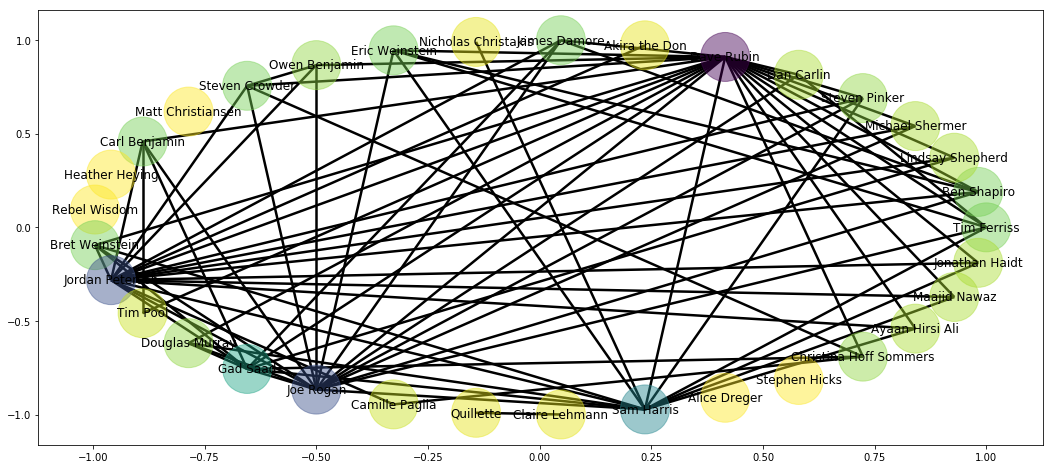

In [150]:

# Draw the graph using various layouts
pos_dict = LAYOUT_DICT['circular_layout']
degree_dict = idw_graph.degree()
draw_graph(idw_graph, pos_dict, degree_dict)

In [151]:

idw_graph.edges(data=True)

EdgeDataView([('Tim Ferriss', 'Dave Rubin', {'youtube_url_set': {'https://www.youtube.com/watch?v=QP2-8Zox4W8'}}), ('Tim Ferriss', 'Eric Weinstein', {'youtube_url_set': {'https://www.youtube.com/watch?v=8LPwyy4scAc'}}), ('Tim Ferriss', 'Dan Carlin', {'youtube_url_set': {'https://www.youtube.com/watch?v=gWVH8xkdhaY'}}), ('Tim Ferriss', 'Joe Rogan', {'youtube_url_set': {'https://www.youtube.com/watch?v=IRyO_nd4aFY'}}), ('Tim Ferriss', 'Sam Harris', {'youtube_url_set': {'https://www.youtube.com/watch?v=W7LvxGfP7II'}}), ('Ben Shapiro', 'Eric Weinstein', {'youtube_url_set': {'https://www.youtube.com/watch?v=HOxmIjiRqTw'}}), ('Ben Shapiro', 'James Damore', {'youtube_url_set': {'https://www.youtube.com/watch?v=RPGXkPVw93A'}}), ('Ben Shapiro', 'Dave Rubin', {'youtube_url_set': {'https://www.youtube.com/watch?v=FmH7JUeVQb8'}}), ('Ben Shapiro', 'Jordan Peterson', {'youtube_url_set': {'https://www.youtube.com/watch?v=iRPDGEgaATU'}}), ('Ben Shapiro', 'Joe Rogan', {'youtube_url_set': {'https://www.

In [152]:

idw_graph.nodes(data=False)

NodeView(('Tim Ferriss', 'Ben Shapiro', 'Lindsay Shepherd', 'Michael Shermer', 'Steven Pinker', 'Dan Carlin', 'Dave Rubin', 'Akira the Don', 'James Damore', 'Nicholas Christakis', 'Eric Weinstein', 'Owen Benjamin', 'Steven Crowder', 'Matt Christiansen', 'Carl Benjamin', 'Heather Heying', 'Rebel Wisdom', 'Bret Weinstein', 'Jordan Peterson', 'Tim Pool', 'Douglas Murray', 'Gad Saad', 'Joe Rogan', 'Camille Paglia', 'Quillette', 'Claire Lehmann', 'Sam Harris', 'Alice Dreger', 'Stephen Hicks', 'Christina Hoff Sommers', 'Ayaan Hirsi Ali', 'Maajid Nawaz', 'Jonathan Haidt'))